# Cyborg-Jam-Lesson-1: CNN for Dogs & Cats

## Basic setup and needed utilities

In [1]:
# To include at the top of every Jam so that we get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# navigate to the right directory (seeing that cyborg-jams changed the folder structure)
import sys
sys.path.append("../../")

In [3]:
# import the libraries we will be using
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Always check that we have torch.cuda.is_available and torch.backends.cudnn.enabled

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [7]:
!ls

cyborg-jam-lesson1.ipynb  data


Set Path directory to the folder containing data for this cyborg-jam. And set size as sz = 224 for now

In [8]:
os.listdir("data")

['dogscats', 'titanic', '.kaggle-cli']

In [9]:
PATH = "data/dogscats/"
sz = 224

## Checking the data we have for basic sanity checks

Output the path info and check out a file image or too to make sure everything is good to go

In [8]:
os.listdir(PATH)

['train', 'test1', 'models', 'sample', 'tmp', 'valid']

In [9]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [10]:
files = os.listdir(f'{PATH}valid/cats')

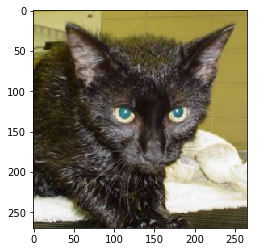

In [11]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

## Finding learning rate and train with precompute

In [ ]:
arch = resnet34

In [ ]:
data = ImageClassifierData.from_paths(path=PATH,tfms=tfms_from_model(arch,sz))

In [ ]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

In [ ]:
learn.fit(1e-2,3)

In [ ]:
lrf = learn.lr_find()

In [ ]:
learn.sched.plot()

**NOTE:** before moving forward, it is helpful to also look at some of the best predictions, worst predictions, most uncertain, etc. to make sure the model is doing what we expect it to do.

## Data augmentation and retrain

In [ ]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [ ]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

In [ ]:
learn = ConvLearner.pretrained(arch, data)

In [ ]:
learn.precompute = False

In [ ]:
learn.fit(1e-2,3,cycle_len=1)

In [ ]:
learn.save("augmented_lastlayer_with_precompute")

## Train full unfrozen network with differential learning rates

In [ ]:
learn.load("augmented_lastlayer_with_precompute")

In [ ]:
learn.unfreeze()

In [ ]:
lr = np.array([1e-4,1e-3,1e-2])

Use cycle_mult=2 and train model until overfitting

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save("augmented_lastlayer_with_precompute")

## Use TTA to predict

In [ ]:
log_preds,y = learn.TTA()

In [ ]:
probs = np.mean(np.exp(log_preds),0)

In [ ]:
accuracy_np(probs,y)

We end up with 99.5% accuracy.

## Analyzing results

In [ ]:
preds = np.argmax(probs,axis=1)

In [ ]:
preds

In [ ]:
probs=probs[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,preds)

In [ ]:
plot_confusion_matrix(cm,data.classes)